# The network of charge stations in Catalonia (GENCAT)

In this project I will analyse the most recent database published by the government (4th December 2015) state of the charging stations in catalonia.
The data is provided by the Open Data project from "Generalitat de Catalunya".

In [24]:
import numpy as np
import pandas as pd
import csv
import sys

# DATA CLEANING
data = './data/xarxa.csv'
#np.loadtxt(data, skiprows=1, delimiter=';', usecols=(1,2,3))
df = pd.read_csv(data,';',encoding='latin-1');
df = df.dropna(axis=0,how='all');
df = df.drop(df.columns[[0,1,2,3,6,7,8,9,10,11,13,15,16,17,18]],1)
df

,LATITUD,LONGITUD,MUNICIPI,NPLACES
0,41.401478,2.156578,Barcelona,1
1,41.398969,2.153493,Barcelona,1
2,41.379559,2.162010,Barcelona,1
3,41.385654,2.177128,Barcelona,3
4,41.382126,2.168188,Barcelona,3
5,41.379272,2.169613,Barcelona,4
6,41.375320,2.169709,Barcelona,1
7,41.383144,2.150551,Barcelona,1
8,41.390085,2.143525,Barcelona,1
9,41.401794,2.160702,Barcelona,1


In [25]:
# add an index that will be the id
df['id'] = df.index
df

,LATITUD,LONGITUD,MUNICIPI,NPLACES,id
0,41.401478,2.156578,Barcelona,1,0
1,41.398969,2.153493,Barcelona,1,1
2,41.379559,2.162010,Barcelona,1,2
3,41.385654,2.177128,Barcelona,3,3
4,41.382126,2.168188,Barcelona,3,4
5,41.379272,2.169613,Barcelona,4,5
6,41.375320,2.169709,Barcelona,1,6
7,41.383144,2.150551,Barcelona,1,7
8,41.390085,2.143525,Barcelona,1,8
9,41.401794,2.160702,Barcelona,1,9


# Calculate edge weights as distances between points
Each point will be a node, and each node will be connected with all other nodes (or with the nearest one, we will see...) with a weighted edge. The weight will be the distance in KM.
Each node connected to the nodes that have distance(nodeA,nodeB)<car_autonomy

In [73]:
from geopy.distance import vincenty
from geopy.distance import great_circle
import networkx as nx
car_autonomy = 100 # kms
mat = df.as_matrix();
ncols = mat[1].size
nrows = len(mat)
print "item:",mat[1][2],nrows,ncols
difs = 0
mat_distances = np.zeros((nrows,nrows))
mat_distances_GC = np.zeros((nrows,nrows))

G = nx.Graph()
for i in range(nrows):
    G.add_node(df['id'][i],capacity=df['NPLACES'][i])
for i in range(nrows):
    for j in range(nrows):
        nodeA =[mat[i][0],mat[i][1]]
        nodeB =[mat[j][0],mat[j][1]]
        mat_distances[i][j] = vincenty(nodeA,nodeB).kilometers
        mat_distances_GC[i][j] = great_circle(nodeA,nodeB).kilometers
        if mat_distances[i][j] > 0.0 and mat_distances[i][j] < car_autonomy:
            G.add_edge(df['id'][i],df['id'][j],weight=mat_distances[i][j])
            difs = difs+1
#print mat_distances

item: Barcelona 295 5


In [27]:
print "Number of nodes:",G.number_of_nodes()
print "Number of edges:",G.number_of_edges()

Number of nodes: 295
Number of edges: 40203


In [28]:
df['NPLACES'][4]

3

In [29]:
print pd.DataFrame(mat_distances)

            0           1           2           3           4           5    \
0      0.000000    0.379739    2.476387    2.458120    2.358411    2.696450   
1      0.379739    0.000000    2.270351    2.468630    2.238227    2.569684   
2      2.476387    2.270351    0.000000    1.434350    0.590222    0.636796   
3      2.458120    2.468630    1.434350    0.000000    0.844208    0.947383   
4      2.358411    2.238227    0.590222    0.844208    0.000000    0.338657   
5      2.696450    2.569684    0.636796    0.947383    0.338657    0.000000   
6      3.105811    2.956022    0.797771    1.304749    0.766534    0.438987   
7      2.097665    1.774688    1.037931    2.240429    1.479609    1.651479   
8      1.671132    1.291694    1.938360    2.853314    2.244275    2.490737   
9      0.346640    0.679604    2.471874    2.258397    2.272297    2.609997   
10     3.623443    3.653058    2.267732    1.186860    1.767331    1.633020   
11     3.198965    2.849840    1.693644    3.118104 

In [30]:
print pd.DataFrame(mat_distances_GC)

            0           1           2           3           4           5    \
0      0.000000    0.379640    2.479746    2.457223    2.360400    2.698786   
1      0.379640    0.000000    2.272875    2.466307    2.238997    2.570824   
2      2.479746    2.272875    0.000000    1.432262    0.589387    0.635337   
3      2.457223    2.466307    1.432262    0.000000    0.842956    0.947213   
4      2.360400    2.238997    0.589387    0.842956    0.000000    0.339001   
5      2.698786    2.570824    0.635337    0.947213    0.339001    0.000000   
6      3.108953    2.958058    0.796990    1.305572    0.767593    0.439639   
7      2.100319    1.777192    1.036123    2.235407    1.476238    1.648105   
8      1.670915    1.291576    1.936573    2.847072    2.240432    2.487202   
9      0.345856    0.678589    2.475523    2.258589    2.275016    2.613066   
10     3.621091    3.649289    2.262519    1.185418    1.763393    1.629277   
11     3.202160    2.853024    1.690432    3.112769 

In [31]:
import folium
from IPython.display import HTML
import folium
 
def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))
 
def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))

In [37]:
fmap=folium.Map(location=[41.7, 2],zoom_start=7)
def plotmarker(row):
    fmap.add_children( [row['LATITUD'], row['LONGITUD']] )
    
# "for" loops are common to a wide variety of proramming languages, allowing you to do something a particular number
# of times or for each item in a list or set of things.
#The iterrows() method enables you to iterate through each row in the dataframe.
#This allows you to do something to each row in turn
#iterrows() actually returns a couple of items at each pass - the row index value, and the row values by column name
#We want to access the second of those items, the row values by column name, so count to the second item: 0,1,..
#Once we have that second item, we need to say which column value we want from the row

for row in df.iterrows():
    popup_txt = str(row[1]['id'])+ " " +row[1]['MUNICIPI']
    #The 'latitude' and 'longitude' names correspond to column names in the original cceats dataframe
    latlon = [ row[1]['LATITUD'], row[1]['LONGITUD'] ]
    fmap.simple_marker( latlon,popup= popup_txt )
embed_map(fmap)

C:\Users\alsol\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
C:\Users\alsol\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: Map.create_map is deprecated. Use Map.save instead


In [119]:
try:
    list_ids = nx.shortest_path(G,258,262,weight=True)
    for i in list_ids:
        print "Id:\t",i,"\tMunicipi:\t",df['MUNICIPI'][i]
    print n
except nx.NetworkXNoPath:
    print 'No path'

Id:	258 	Municipi:	Esterri d'Àneu
Id:	254 	Municipi:	Ripoll
Id:	0 	Municipi:	Barcelona
Id:	246 	Municipi:	Vilanova i la Geltrú
Id:	262 	Municipi:	L'Ampolla
4


AttributeError: 'function' object has no attribute 'items'

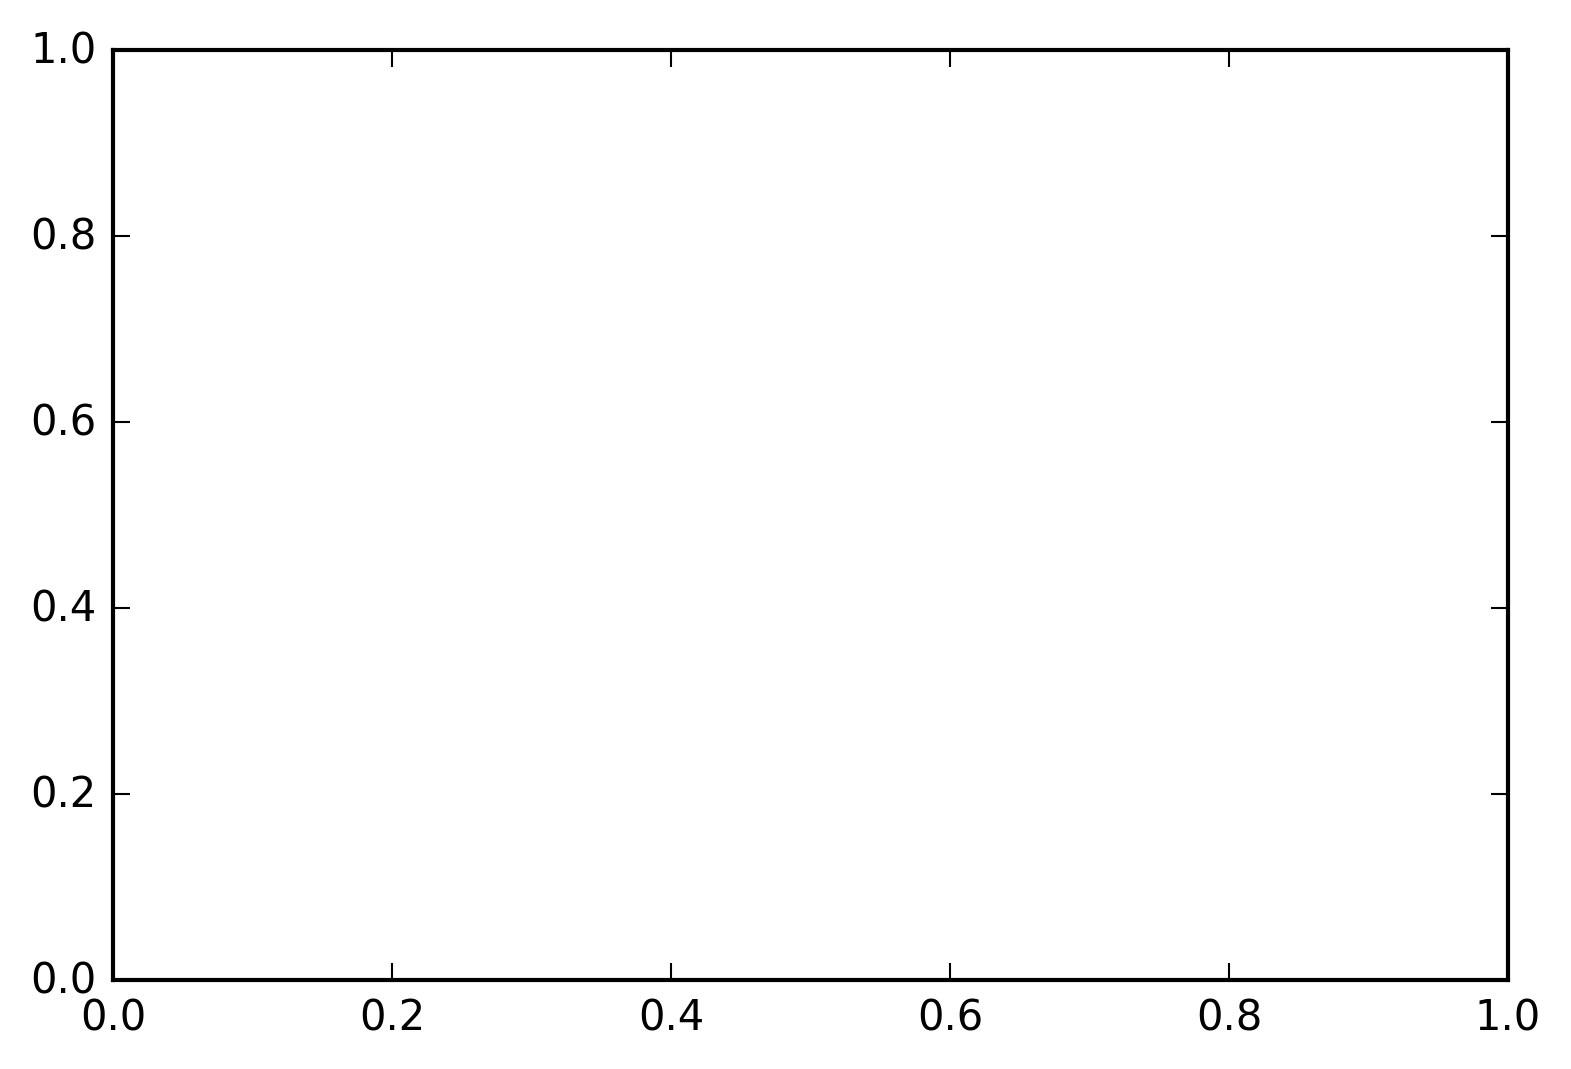

In [120]:
pos = nx.spring_layout(G)
nx.draw_networkx_labels(G,pos,G.nodes,str([itm for itm in df['id']]),node_color='b',alpha=0.8)

In [121]:
[itm for itm in df['id']]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


# Real roads information
Comes from geofabrik shp data

In [196]:
# import the packages
import networkx as nx
import numpy as np
import pandas as pd
import json
import smopy
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = mpl.rcParams['savefig.dpi'] = 300

In [197]:
# load data (a shapefile dataset) with networkx.
# contains info about roads in spain
# returns a graph, where each node is a geographical position, and each edge 
# contains information about the road linking the two nodes.
g = nx.read_shp("./ESP_roads.shp")

In [198]:
# connected graph to compute shortest paths.largest connected subgraph
sg = list(nx.connected_component_subgraphs(g.to_undirected()))[0]
len(sg)

2328

In [199]:
# two positions to find shortest path
id1 = 254
id2 = 261
out = []
def pos_i_list(list_ids):
    for itm in list_ids:
        out.append((df['LATITUD'][itm], df['LONGITUD'][itm]))
    return out
def pos_i(itm):
    return (df['LATITUD'][itm], df['LONGITUD'][itm])
print pos_i(12)

(41.385727000000003, 2.1428500000000001)


In [200]:
out

[]

In [201]:
# each edge contains info about road.
def get_path(n0, n1):
    """If n0 and n1 are connected nodes in the graph, this function
    return an array of point coordinates along the road linking
    these two nodes."""
    return np.array(json.loads(sg[n0][n1]['Json'])['coordinates'])
# use road to compute length
EARTH_R = 6372.8
def geocalc(lat0, lon0, lat1, lon1):
    """Return the distance (in km) between two points in 
    geographical coordinates."""
    lat0 = np.radians(lat0)
    lon0 = np.radians(lon0)
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    dlon = lon0 - lon1
    y = np.sqrt(
        (np.cos(lat1) * np.sin(dlon)) ** 2
         + (np.cos(lat0) * np.sin(lat1) 
         - np.sin(lat0) * np.cos(lat1) * np.cos(dlon)) ** 2)
    x = np.sin(lat0) * np.sin(lat1) + \
        np.cos(lat0) * np.cos(lat1) * np.cos(dlon)
    c = np.arctan2(y, x)
    return EARTH_R * c

# compute path's length
def get_path_length(path):
    return np.sum(geocalc(path[1:,0], path[1:,1],
                          path[:-1,0], path[:-1,1]))

def get_full_path(path):
    """Return the positions along a path."""
    p_list = []
    curp = None
    for i in range(len(path)-1):
        p = get_path(path[i], path[i+1])
        if curp is None:
            curp = p
        if np.sum((p[0]-curp)**2) > np.sum((p[-1]-curp)**2):
            p = p[::-1,:]
        p_list.append(p)
        curp = p[-1]
    return np.vstack(p_list)

In [202]:
# Compute the length between any two connected nodes.
def get_route_electric(list_ids):
    total_dist = []
    final_path = []
    for n0, n1 in sg.edges_iter():
            path = get_path(n0, n1)
            distance = get_path_length(path)
            sg.edge[n0][n1]['distance'] = distance
    for indx in xrange(0,len(list_ids)-1):
        
        pos0 = pos_i(list_ids[indx])
        pos1 = pos_i(list_ids[indx+1])
        
        nodes = np.array(sg.nodes())
        # Get the closest nodes in the graph.
        pos0_i = np.argmin(np.sum((nodes[:,::-1] - pos0)**2, axis=1))
        pos1_i = np.argmin(np.sum((nodes[:,::-1] - pos1)**2, axis=1))
        # Compute the shortest path.
        path = nx.shortest_path(sg, 
                                source=tuple(nodes[pos0_i]), 
                                target=tuple(nodes[pos1_i]),
                                weight='distance')
        final_path.append(path)
        roads = pd.DataFrame([sg.edge[path[i]][path[i + 1]] 
                      for i in range(len(path) - 1)], 
                     columns=['distance'])
        total_dist.append(roads['distance'].sum())
    return [final_path,total_dist]

In [264]:
[path,total_dist]= get_route_electric(list_ids)


Lowered zoom level to keep map size reasonable. (z = 8)
Total Kms: 444.082990856
Distance between points: [154.30989648578407, 103.65987280352134, 62.14315995574286, 123.97006161093637]


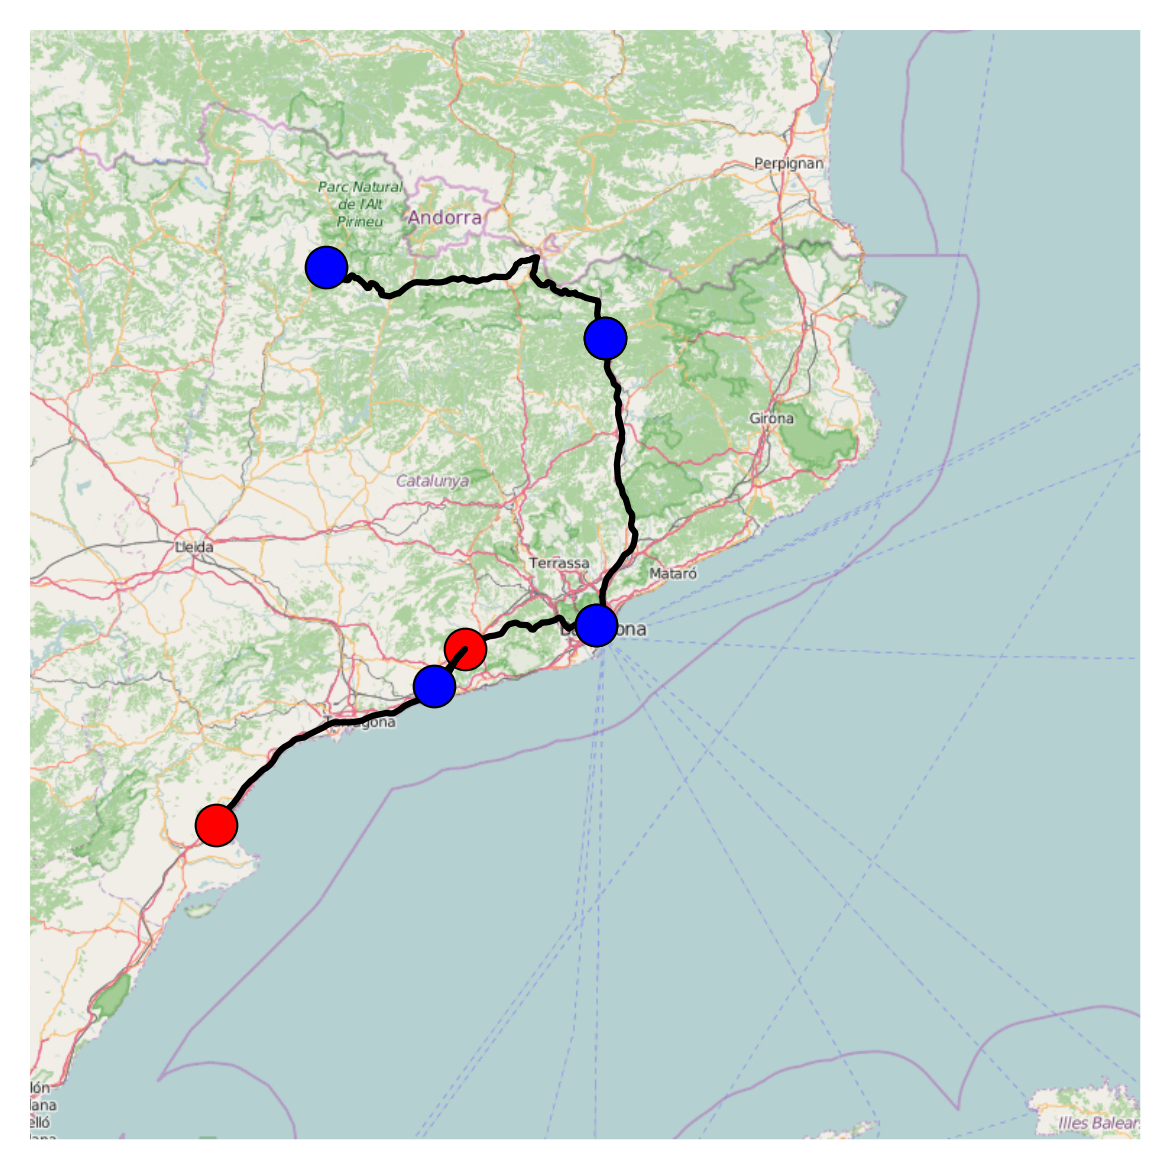

In [265]:
map = smopy.Map((41, 0.6, 42.5, 2.9))
# convert path in pixels to display it on the smopy map
linepath = []
plt.figure(figsize=(6,10));
map.show_mpl();
for path_single in path:
    linepath = get_full_path(path_single)
    #map.show_mpl();
    x, y = map.to_pixels(linepath[:,1], linepath[:,0])
    # show map
    
    
    # Plot the itinerary.
    plt.plot(x, y, '-k', lw=1.5);
    # Mark our two positions.
    plt.plot(x[0], y[0], 'ob', ms=10);
    plt.plot(x[-1], y[-1], 'or', ms=10);
print "Total Kms:",sum(total_dist)
print "Distance between points:",total_dist

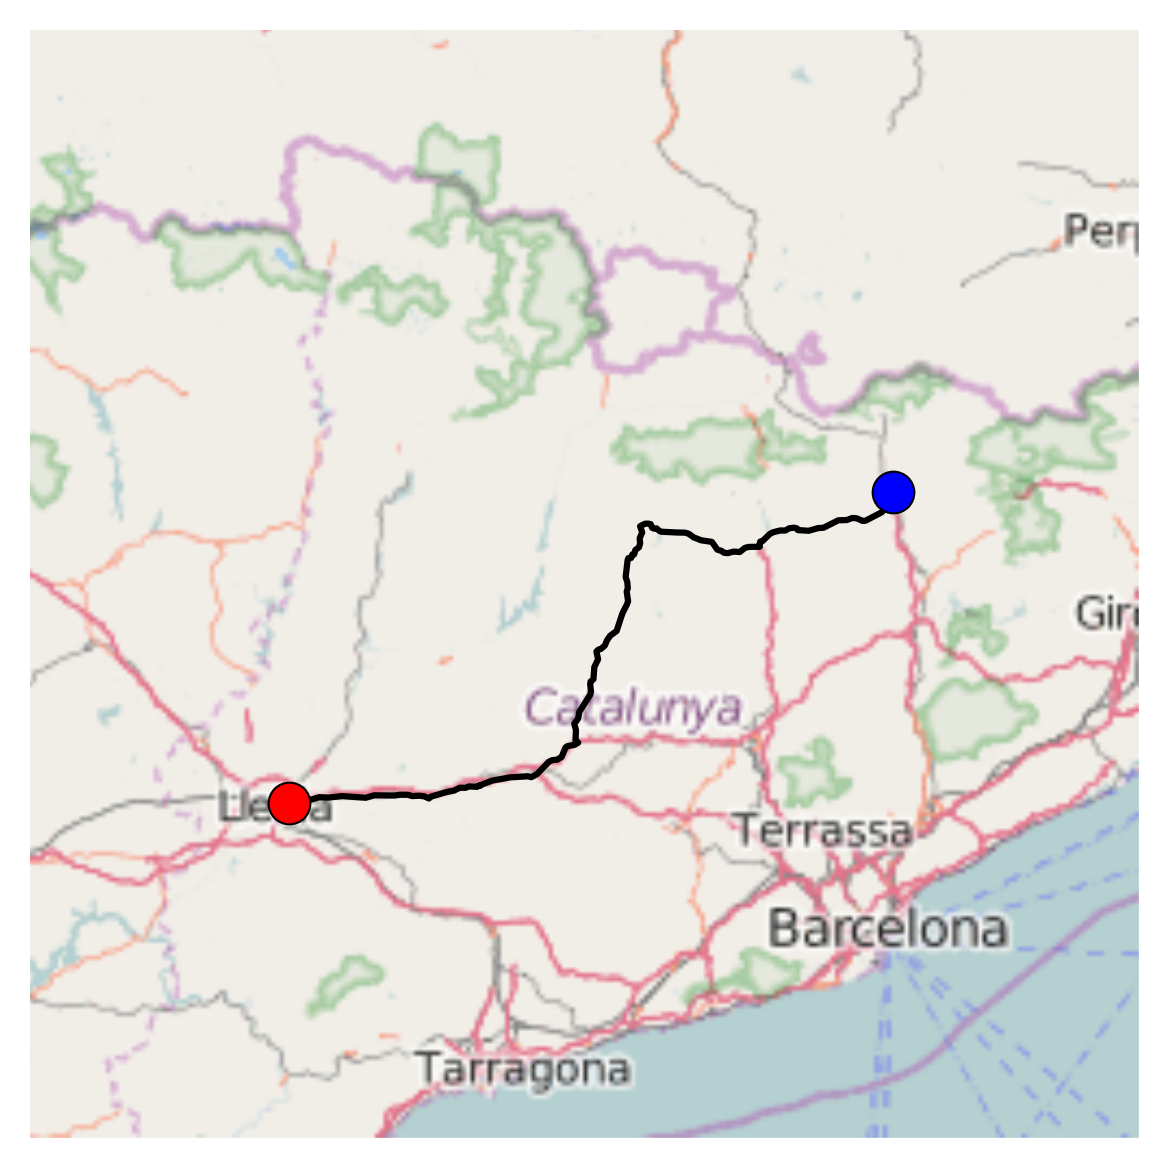

In [192]:
# Compute the length of the road segments.
for n0, n1 in sg.edges_iter():
    path = get_path(n0, n1)
    distance = get_path_length(path)
    sg.edge[n0][n1]['distance'] = distance
    nodes = np.array(sg.nodes())
# Get the closest nodes in the graph.
pos0_i = np.argmin(np.sum((nodes[:,::-1] - pos0)**2, axis=1))
pos1_i = np.argmin(np.sum((nodes[:,::-1] - pos1)**2, axis=1))
# Compute the shortest path.
path = nx.shortest_path(sg, 
                        source=tuple(nodes[pos0_i]), 
                        target=tuple(nodes[pos1_i]),
                        weight='distance')
len(path)
roads = pd.DataFrame([sg.edge[path[i]][path[i + 1]] 
                      for i in range(len(path) - 1)], 
                     columns=['FULLNAME', 'MTFCC', 
                              'RTTYP', 'distance'])
roads
map = smopy.Map(pos0, pos1, z=7, margin=.1)
linepath = get_full_path(path)
x, y = map.to_pixels(linepath[:,1], linepath[:,0])

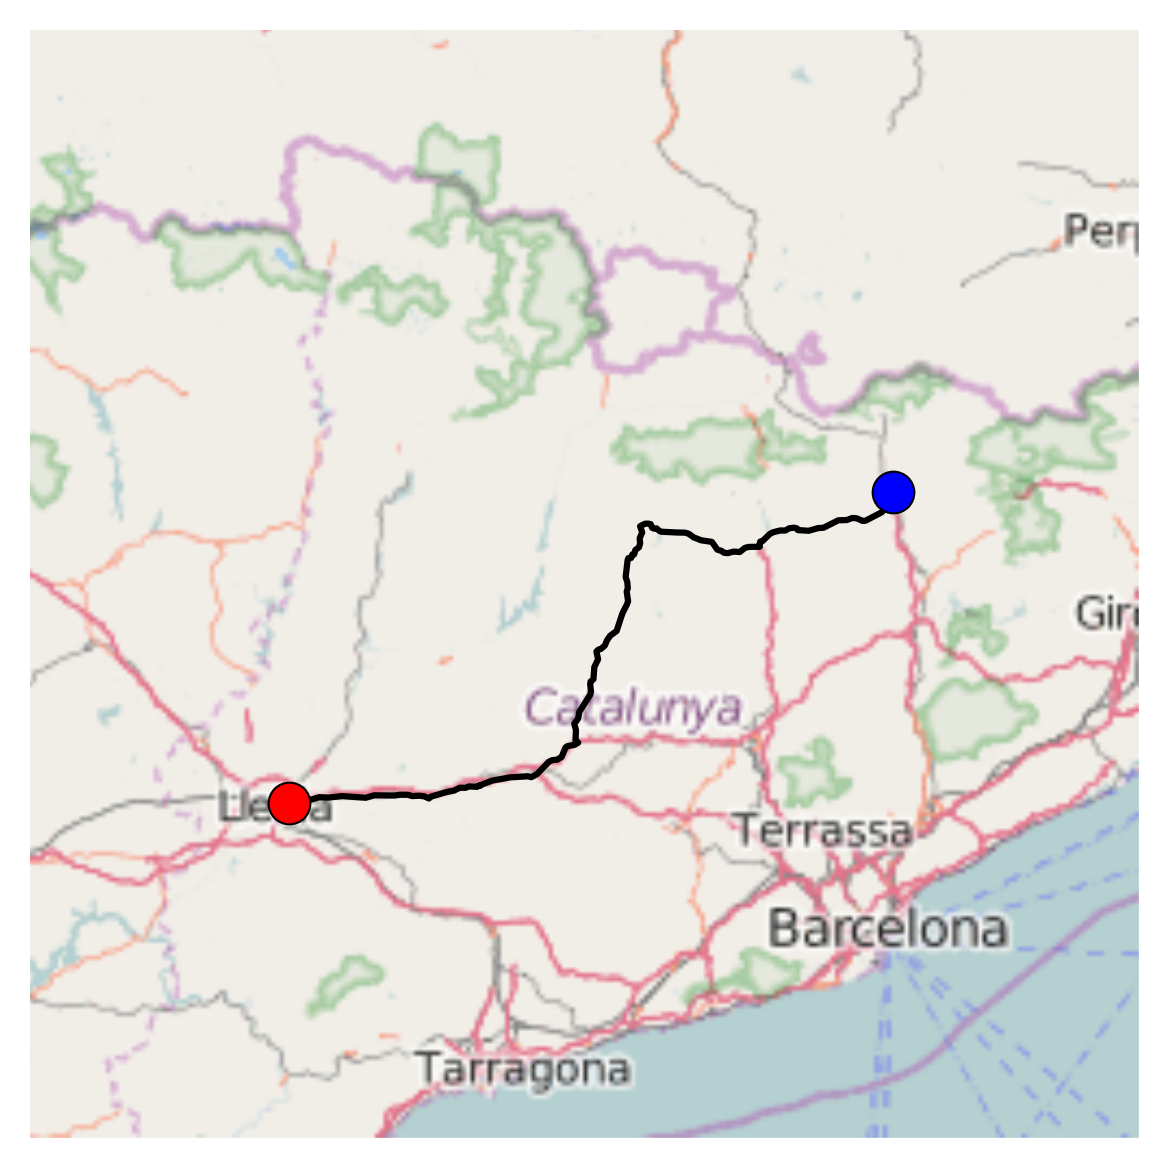

In [193]:
plt.figure(figsize=(6,6));
map.show_mpl();
# Plot the itinerary.
plt.plot(x, y, '-k', lw=1.5);
# Mark our two positions.
plt.plot(x[0], y[0], 'ob', ms=10);
plt.plot(x[-1], y[-1], 'or', ms=10);

In [191]:
print linepath

[[  2.18538885  42.20705418]
 [  2.18466668  42.20325094]
 [  2.18425013  42.20102697]
 [  2.18233329  42.1911659 ]
 [  2.18233329  42.1911659 ]
 [  2.16291675  42.17383195]
 [  2.16044444  42.17163842]
 [  2.15827775  42.16972347]
 [  2.11730557  42.15394594]
 [  2.11013888  42.15325174]
 [  2.09469437  42.15835947]
 [  2.08397221  42.15902701]
 [  2.0693334   42.15510942]
 [  2.05669459  42.15480419]
 [  2.04800003  42.15460971]
 [  2.01066667  42.14064034]
 [  2.00461111  42.1403351 ]
 [  1.99672225  42.13991552]
 [  1.97305567  42.13494482]
 [  1.94544447  42.13619619]
 [  1.94333334  42.13952637]
 [  1.93516665  42.14072029]
 [  1.92363897  42.13961029]
 [  1.91361101  42.13538746]
 [  1.9008055   42.13550181]
 [  1.90066678  42.13550181]
 [  1.88274996  42.13225176]
 [  1.88224986  42.13202666]
 [  1.87919449  42.13077926]
 [  1.8740278   42.12863922]
 [  1.86013894  42.11861031]
 [  1.85527786  42.11508187]
 [  1.85030565  42.11469272]
 [  1.85030565  42.11469272]
 [  1.84847216

In [194]:
print path

[(2.1853888519137383, 42.207054182590717), (2.1823332889194513, 42.19116589762043), (1.8503056495402563, 42.11469271776341), (1.8492498955422303, 42.10488890978174), (1.545888831109436, 42.14361198570934), (1.5120555631726955, 41.99560929898607), (1.389111252402569, 41.73566814947209), (1.2703054746247049, 41.670307224594296), (1.136999994873951, 41.654304594624215), (1.0109167721096939, 41.62991716866981), (0.6566944847719969, 41.62119292868613)]
